In [9]:
# 필요한 라이브러리 임포트
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_feature_SIFT(fname1, fname2, showImg) :
    # 이미지 불러오기
    img1 = cv2.imread(fname1)
    img2 = cv2.imread(fname2)
    
    # 색상변환
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # SIFT
    sift = cv2.xfeatures2d.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1_gray, None)
    kp2, des2 = sift.detectAndCompute(img2_gray, None)

    # 출력
    if showImg :
        plt.subplot(121)
        plt.imshow(img1)
        for i in range(len(kp1)) :
            plt.scatter(kp1[i].pt[0], kp1[i].pt[1], c='red', s=0.5)
        
        plt.subplot(122)
        plt.imshow(img2)
        for i in range(len(kp2)) :
            plt.scatter(kp2[i].pt[0], kp2[i].pt[1], c='red', s=0.5)
        
        plt.show()
    return kp1, kp2, des1, des2

In [10]:
# fnames : 영상 파이 ㄹ이름 목록
def get_matches(des1, des2, ratio=0.7) :
    # idx1과 idx2에 각 인덱스 저장
    # idx1과 idx2의 같은 위치의 수는 서로 매칭되는 키포인트 인덱스
    idx1, idx2 = [], []
    correct, incorrect = 0, 0
    for i, d1 in enumerate(des1) :
        # 유클리드 거리 계산
        distances = np.linalg.norm(des2 - d1, axis=1) 
        # d1과 가장 가까운 des2에서의 벡터 2개의 위치 산출
        nearest_neighbor = np.argsort(distances)[:2]
        # 가장 가까운 거리 두 개의 비율을 비교
        distance1, distance2 = distances[nearest_neighbor[0]], distances[nearest_neighbor[1]]
        if (distance1/max(1e-6, distance2)) < ratio :
            idx1.append(i)
            idx2.append(nearest_neighbor[0])
            
    return idx1, idx2

In [11]:
def image_feature_match_draw(fname1, fname2, kp1, kp2, idx1, idx2) :
    # 이미지 불러오기
    img1 = cv2.imread(fname1, 0)
    img2 = cv2.imread(fname2, 0)    
    
    # 이미지 붙이기 (이미지 결과 보여주기 준비)
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    hdif = int((h2 - h1) / 2)
    
    nWidth = w1 + w2
    nHeight = max(h1, h2)
    newImg = np.zeros((nHeight, nWidth, 3), np.uint8)
    
    for i in range(3) :
        newImg[hdif:hdif + h1, :w1, i] = img1
        newImg[:h2, w1:w1 + w2, i] = img2
    
    # 올바른 매치 올바르지 않은 매치 구하기
    correct, incorrect = 0, 0
    # get_match에서 얻은 정보들로 라인 긋기
    for i in range(len(idx1)) :
        point1 = (int(kp1[idx1[i]].pt[0]), int(kp1[idx1[i]].pt[1] + hdif))
        point2 = (int(kp2[idx2[i]].pt[0] + w1), int(kp2[idx2[i]].pt[1]))
        cv2.line(newImg, point1, point2, (255, 0, 0))
        
        x_delta = int(kp2[idx2[i]].pt[0] + w1) - int(kp1[idx1[i]].pt[0])
        y_delta = int(kp2[idx2[i]].pt[1]) - int(kp1[idx1[i]].pt[1] + hdif)
        gradient = abs(x_delta / y_delta)
        if gradient > 200 :
            incorrect = incorrect + 1
        else :
            correct = correct + 1
        
    plt.imshow(newImg)
    plt.show()
    
    return correct, incorrect

In [12]:
def SIFT_feature_matching(fname1, fname2, ratio, showImg) :
    kp1, kp2, des1, des2 = get_feature_SIFT(fname1, fname2, showImg)
    idx1, idx2 = get_matches(des1, des2, ratio)
    if showImg :
        correct, incorrect = image_feature_match_draw(fname1, fname2, kp1, kp2, idx1, idx2)
        print("잘 매칭된 feature 쌍의 개수 : ", correct)
        print("잘 매칭되지 못한 feature 쌍의 개수 : ", incorrect)

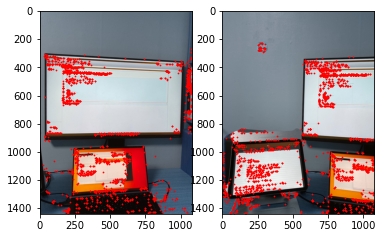

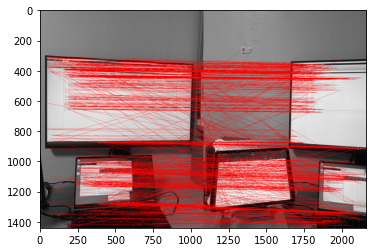

잘 매칭된 feature 쌍의 개수 :  913
잘 매칭되지 못한 feature 쌍의 개수 :  42


In [13]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.9, True)

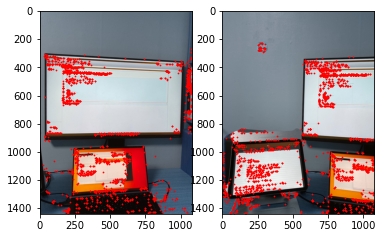

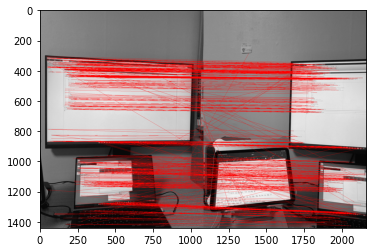

잘 매칭된 feature 쌍의 개수 :  595
잘 매칭되지 못한 feature 쌍의 개수 :  28


In [14]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.8, True)

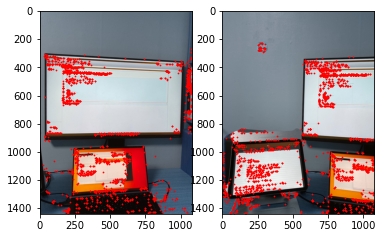

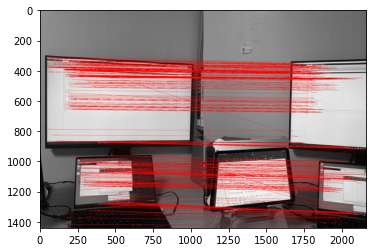

잘 매칭된 feature 쌍의 개수 :  467
잘 매칭되지 못한 feature 쌍의 개수 :  16


In [15]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.7, True)

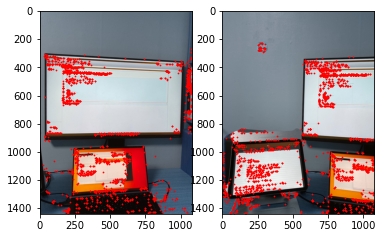

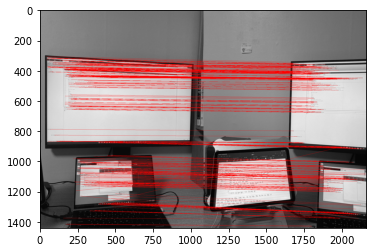

잘 매칭된 feature 쌍의 개수 :  380
잘 매칭되지 못한 feature 쌍의 개수 :  10


In [16]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.6, True)

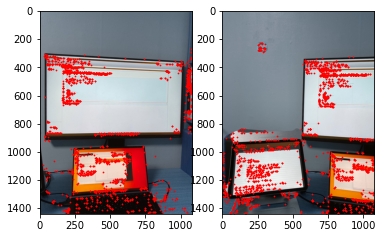

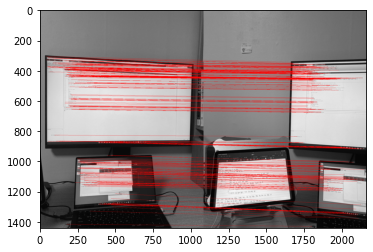

잘 매칭된 feature 쌍의 개수 :  281
잘 매칭되지 못한 feature 쌍의 개수 :  6


In [17]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.5, True)

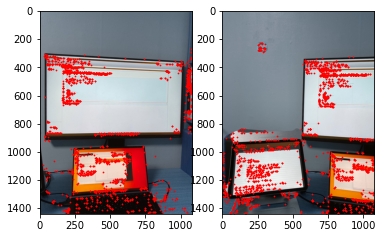

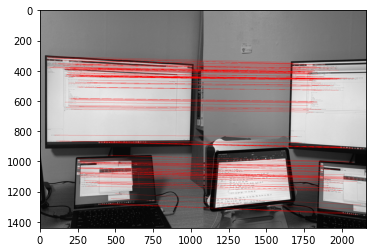

잘 매칭된 feature 쌍의 개수 :  165
잘 매칭되지 못한 feature 쌍의 개수 :  1


In [18]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.4, True)

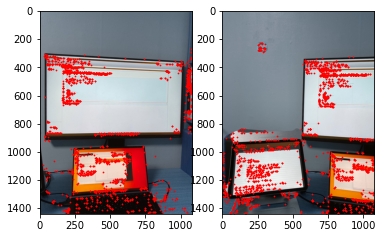

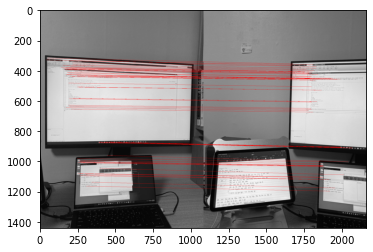

잘 매칭된 feature 쌍의 개수 :  65
잘 매칭되지 못한 feature 쌍의 개수 :  0


In [19]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.3, True)

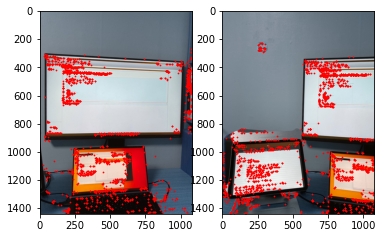

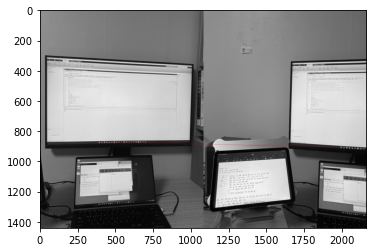

잘 매칭된 feature 쌍의 개수 :  1
잘 매칭되지 못한 feature 쌍의 개수 :  0


In [20]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.2, True)

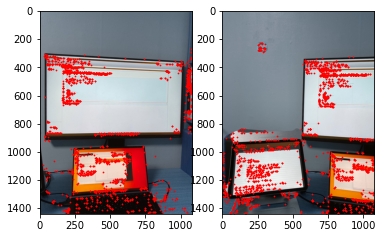

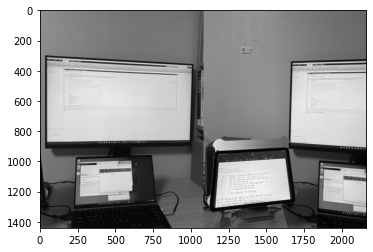

잘 매칭된 feature 쌍의 개수 :  0
잘 매칭되지 못한 feature 쌍의 개수 :  0


In [21]:
SIFT_feature_matching('./data/sample.jpg', './data/sample1.jpg', 0.1, True)

In [22]:
kp1, kp2, des1, des2 = get_feature_SIFT('./data/sample.jpg', './data/sample1.jpg', False)

In [23]:
print("키포인트의 타입 : ", type(kp1))
print("키포인트의 길이 : ", len(kp1))
print("개별 키포인트의 타입 : ", type(kp1[0]))
print("키포인트의 위치 예시 : ", kp1[0].pt)
print("descriptor의 타입 : ", type(des1))
print("descriptor의 크기 : ", des1.shape)
print("descriptor 예시 : ", des1[0])

키포인트의 타입 :  <class 'tuple'>
키포인트의 길이 :  2002
개별 키포인트의 타입 :  <class 'cv2.KeyPoint'>
키포인트의 위치 예시 :  (21.07024383544922, 1090.223388671875)
descriptor의 타입 :  <class 'numpy.ndarray'>
descriptor의 크기 :  (2002, 128)
descriptor 예시 :  [136.  12.   0.   0.   0.   0.   0.   0. 178.  17.   0.   0.   0.   0.
   0.   1.  97.   4.   0.   0.   1.   1.   0.   1.   0.   1.   1.   1.
   2.   1.   0.   0. 159.  13.   0.   0.   0.   0.   0.   9. 178.   7.
   0.   0.   0.   0.   0.  15. 120.   2.   0.   0.   0.   0.   0.   6.
   0.   0.   0.   1.   1.   2.   3.   1. 160.   3.   0.   0.   0.   0.
   0.  25. 178.   3.   0.   0.   0.   0.   0.  16. 117.   6.   0.   0.
   0.   0.   0.   3.   3.   1.   0.   1.   1.   1.   2.   2. 134.   6.
   0.   0.   0.   0.   0.   3. 178.  16.   0.   0.   0.   0.   0.   1.
  92.   6.   0.   0.   0.   0.   0.   1.   2.   2.   1.   2.   1.   0.
   0.   0.]


In [24]:
des1[0][90]

0.0